# Funnel Analysis

This is a funnel analysis on the e-commerce dataset provided in the book called "Collection of Take Home Data Science Challenges". Most Analysis done here are graphic in nature. Machine learning technique was not employed since it's not quite necessary for this analysis.

## Pre Processing

Before anything, I will first load in the packages and the data set that we will need later on

In [20]:
library(tidyverse)
library(ggplot2)
library(gridExtra)
home_page_table <- read.csv("home_page_table.csv")
pay_conf_table <- read.csv("payment_confirmation_table.csv")
pay_page_table <- read.csv("payment_page_table.csv")
sear_page_table <- read.csv("search_page_table.csv")
user_table <- read.csv("user_table.csv")

Since there's a unifying variable in all the datasets that is the user_id, I will simply merge all the data together into one data set for easier usage

In [2]:
comp <- merge(user_table, home_page_table, by = "user_id", all.x = TRUE)
comp <- merge(comp, sear_page_table, by = "user_id", all.x = TRUE)
colnames(comp) <- c("user_id", "date", "device", "sex", "page.home", 
                    "page.sear")
comp <- merge(comp, pay_page_table, by = "user_id", all.x = TRUE)
comp <- merge(comp, pay_conf_table, by = "user_id", all.x = TRUE)
colnames(comp) <- c("user_id", "date", "device", "sex", "page.home", 
                    "page.sear", "page.pay", "page.conf")

Now we will reclassify all the observation in the recently merged columns. All the user that stayed in the page will be assigned with "yes", while those that left just before the page will be assigned with "just left". Those that left prior to that will simply be given a "no". 

In [3]:
comp$page.home <- as.character(comp$page.home)
index <- which(comp$page.home == "home_page")
comp$page.home[index] <- "yes"
comp$page.home[-index] <- "no"
comp$page.home <- as.factor(comp$page.home)
comp$page.sear <- as.character(comp$page.sear)
index <- which(comp$page.sear == "search_page")
comp$page.sear[index] <- "yes"
comp$page.sear[-index] <- "no"
comp$page.sear <- as.factor(comp$page.sear)
comp$page.pay <- as.character(comp$page.pay)
index <- which(comp$page.pay == "payment_page")
comp$page.pay[index] <- "yes"
comp$page.pay[-index] <- "no"
comp$page.pay <- as.factor(comp$page.pay)
comp$page.conf <- as.character(comp$page.conf)
index <- which(comp$page.conf == "payment_confirmation_page")
comp$page.conf[index] <- "yes"
comp$page.conf[-index] <- "no"
comp$page.conf <- as.factor(comp$page.conf)
comp$page.sear <- as.character(comp$page.sear)
comp[comp$page.home == "yes" & comp$page.sear %in% c("no"),]$page.sear <- "just left"
comp$page.sear <- as.factor(comp$page.sear)
comp$page.pay <- as.character(comp$page.pay)
comp[comp$page.sear == "yes" & comp$page.pay %in% c("no"),]$page.pay <- "just left"
comp$page.pay <- as.factor(comp$page.pay)
comp$page.conf <- as.character(comp$page.conf)
comp[comp$page.pay == "yes" & comp$page.conf %in% c("no"),]$page.conf <- "just left"
comp$page.conf <- as.factor(comp$page.conf)

Now I shall briefly look at the data summary to see if there is any anomaly

In [4]:
comp$date <- as.Date(comp$date)
summary(comp)

    user_id            date                device          sex       
 Min.   :    17   Min.   :2015-01-01   Desktop:60200   Female:45075  
 1st Qu.:247979   1st Qu.:2015-01-31   Mobile :30200   Male  :45325  
 Median :498267   Median :2015-02-28                                 
 Mean   :498710   Mean   :2015-03-01                                 
 3rd Qu.:749789   3rd Qu.:2015-03-31                                 
 Max.   :999979   Max.   :2015-04-30                                 
 page.home       page.sear          page.pay         page.conf    
 yes:90400   just left:45200   just left:39170   just left: 5578  
             yes      :45200   no       :45200   no       :84370  
                               yes      : 6030   yes      :  452  
                                                                  
                                                                  
                                                                  

all the variable seems to make sense, I think we can now proceed to the analysis portion

## Analysis

### Funnel Outlook

As indicated by the supplementary questions, the first thing we have to look at would be a full picture of the funnel conversion rate of both users on desktop and mobile. In order to that I would have to first split the data set accordingly.

In [5]:
comp_desktop <- comp[comp$device == "Desktop",]
comp_mobile <- comp[comp$device =="Mobile",]

Before moving on directly into providing the funnel outlook on the two distinct section, it would be nice to show an overall funnel conversion rate across the board.

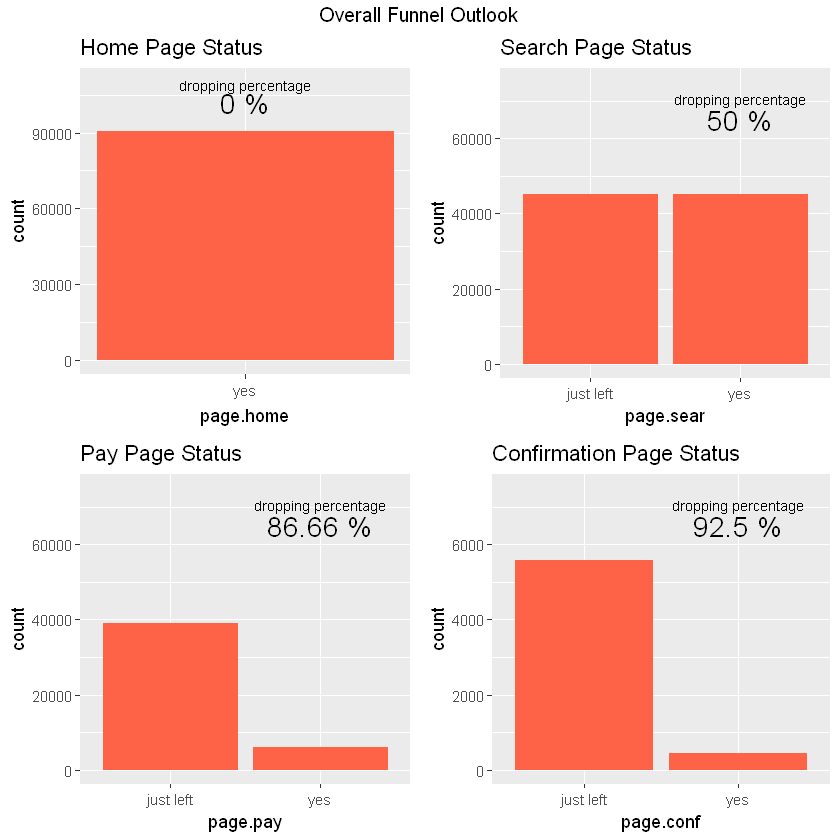

In [6]:
percent <- round(as.numeric(count(comp, page.sear == "just left")[2, 2])/(as.numeric(count(comp, page.sear == "yes")[2, 2]) + as.numeric(count(comp, page.sear == "just left")[2, 2])),4)
percent2 <- round(as.numeric(count(comp, page.pay == "just left")[2, 2])/(as.numeric(count(comp, page.pay == "yes")[2, 2]) + as.numeric(count(comp, page.pay == "just left")[2, 2])),4)
percent3 <- round(as.numeric(count(comp, page.conf == "just left")[2, 2])/(as.numeric(count(comp, page.conf == "yes")[2, 2]) + as.numeric(count(comp, page.conf == "just left")[2, 2])),4)
g1 <- ggplot(data = comp, aes(x = page.home)) + geom_bar(fill = "tomato") + ylim(0,110000) +
  annotate("text", x=1, y=102000, label= paste(0, "%"), size = 6) +
  annotate("text", x=1, y=109000, label= "dropping percentage" , size = 3) +
    ggtitle("Home Page Status")
g2 <- ggplot(data = comp, aes(x = page.sear)) + geom_bar(fill = "tomato") + ylim(0,75000) +
  annotate("text", x=2, y=65000, label= paste(percent * 100, "%"), size = 6) +
  annotate("text", x=2, y=70500, label= "dropping percentage" , size = 3) +
    ggtitle("Search Page Status")
g3 <- ggplot(data = comp %>% filter(page.pay != "no"), aes(x = page.pay)) + geom_bar(fill = "tomato") + ylim(0,75000) +
  annotate("text", x=2, y=65000, label= paste(percent2 * 100, "%"), size = 6) +
  annotate("text", x=2, y=70500, label= "dropping percentage" , size = 3) +
    ggtitle("Pay Page Status")
g4 <- ggplot(data = comp %>% filter(page.conf != "no"), aes(x = page.conf)) + geom_bar(fill = "tomato") + ylim(0,7500) +
  annotate("text", x=2, y=6500, label= paste(percent3 * 100, "%"), size = 6) +
  annotate("text", x=2, y=7050, label= "dropping percentage" , size = 3) +
    ggtitle("Confirmation Page Status")
grid.arrange(g1,g2,g3,g4, nrow = 2, top = "Overall Funnel Outlook")

As seen from this, the conversion rate is decreasing as we move forward in every page. More and more people seems to be dropping out. This something to be noted when we make the recommendation later.

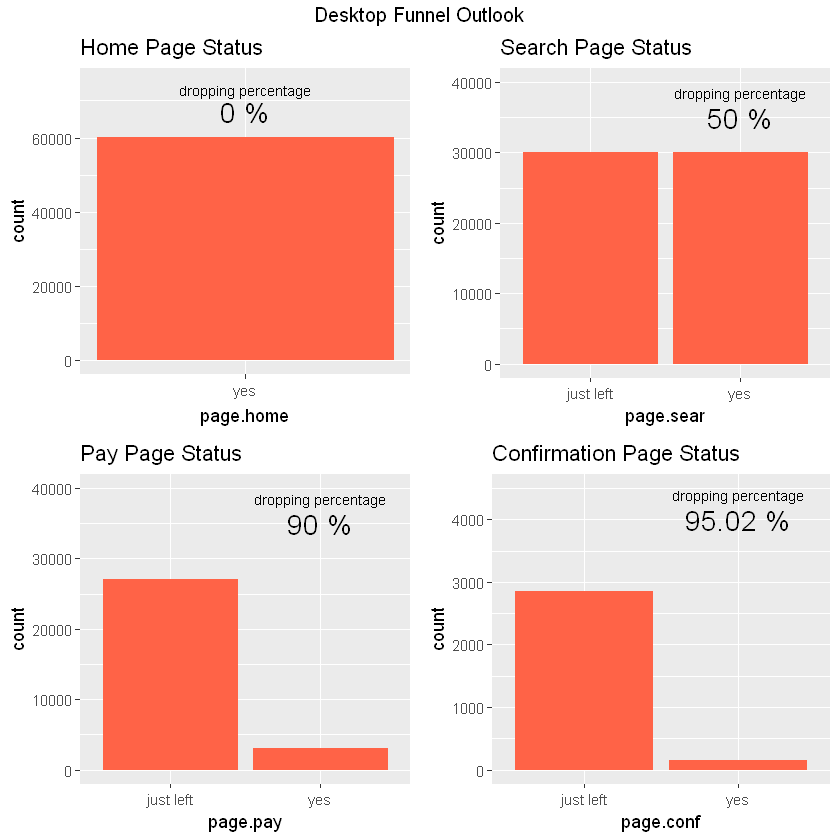

In [7]:
percent <- as.numeric(count(comp_desktop, page.sear == "just left")[2, 2])/(as.numeric(count(comp_desktop, page.sear == "yes")[2, 2]) + as.numeric(count(comp_desktop, page.sear == "just left")[2, 2]))
percent2 <- as.numeric(count(comp_desktop, page.pay == "just left")[2, 2])/(as.numeric(count(comp_desktop, page.pay == "yes")[2, 2]) + as.numeric(count(comp_desktop, page.pay == "just left")[2, 2]))
percent3 <- round(as.numeric(count(comp_desktop, page.conf == "just left")[2, 2])/(as.numeric(count(comp_desktop, page.conf == "yes")[2, 2]) + as.numeric(count(comp_desktop, page.conf == "just left")[2, 2])),4)
g1 <- ggplot(data = comp_desktop, aes(x = page.home)) + geom_bar(fill = "tomato") + ylim(0,75000) +
  annotate("text", x=1, y=67000, label= paste(0, "%"), size = 6) +
  annotate("text", x=1, y=73000, label= "dropping percentage" , size = 3) +
    ggtitle("Home Page Status")
g2 <- ggplot(data = comp_desktop, aes(x = page.sear)) + geom_bar(fill = "tomato") + ylim(0,40000) +
  annotate("text", x=2, y=35000, label= paste(percent * 100, "%"), size = 6) +
  annotate("text", x=2, y=38500, label= "dropping percentage" , size = 3) +
    ggtitle("Search Page Status")
g3 <- ggplot(data = comp_desktop %>% filter(page.pay != "no"), aes(x = page.pay)) + geom_bar(fill = "tomato") + ylim(0,40000) +
  annotate("text", x=2, y=35000, label= paste(percent2 * 100, "%"), size = 6) +
  annotate("text", x=2, y=38500, label= "dropping percentage" , size = 3) +
    ggtitle("Pay Page Status")
g4 <- ggplot(data = comp_desktop %>% filter(page.conf != "no"), aes(x = page.conf)) + geom_bar(fill = "tomato") + ylim(0,4500) +
  annotate("text", x=2, y=4000, label= paste(percent3 * 100, "%"), size = 6) +
  annotate("text", x=2, y=4400, label= "dropping percentage" , size = 3) +
    ggtitle("Confirmation Page Status")
grid.arrange(g1,g2,g3,g4, nrow = 2, top = "Desktop Funnel Outlook")

Now looking at the desktop conversion rate, while it's conversion rate from the home page to search is the same as the overall conversion rate, there is an obvious increase in the amount of people dropping in the pages later on

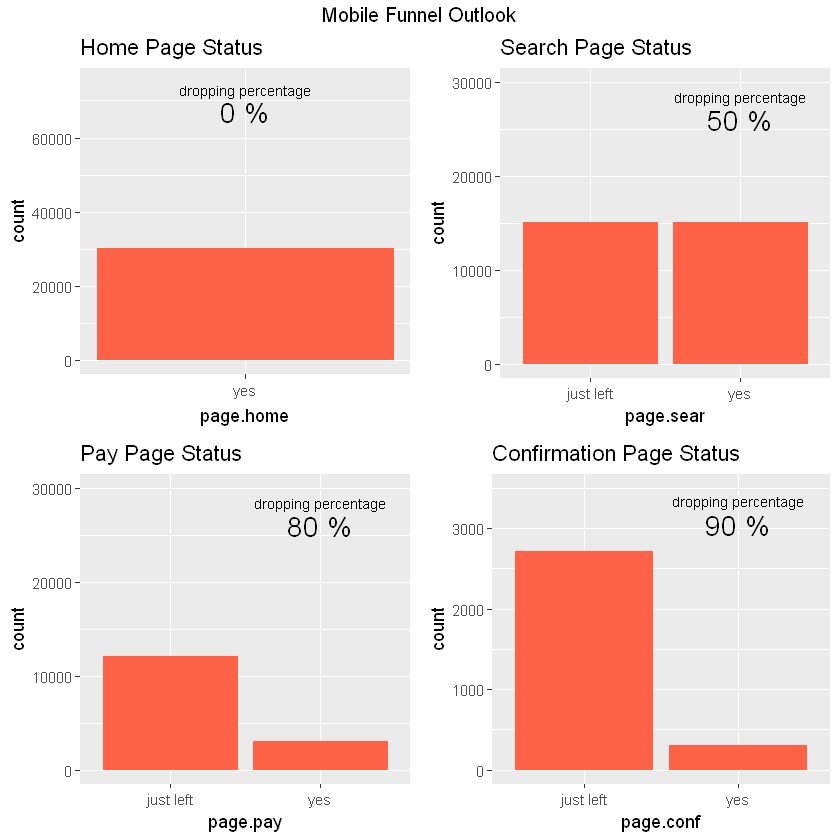

In [8]:
percent <- round(as.numeric(count(comp_mobile, page.sear == "just left")[2, 2])/(as.numeric(count(comp_mobile, page.sear == "yes")[2, 2]) + as.numeric(count(comp_mobile, page.sear == "just left")[2, 2])),4)
percent2 <- round(as.numeric(count(comp_mobile, page.pay == "just left")[2, 2])/(as.numeric(count(comp_mobile, page.pay == "yes")[2, 2]) + as.numeric(count(comp_mobile, page.pay == "just left")[2, 2])),4)
percent3 <- round(as.numeric(count(comp_mobile, page.conf == "just left")[2, 2])/(as.numeric(count(comp_mobile, page.conf == "yes")[2, 2]) + as.numeric(count(comp_mobile, page.conf == "just left")[2, 2])),4)
g1 <- ggplot(data = comp_mobile, aes(x = page.home)) + geom_bar(fill = "tomato") + ylim(0,75000) +
  annotate("text", x=1, y=67000, label= paste(0, "%"), size = 6) +
  annotate("text", x=1, y=73000, label= "dropping percentage" , size = 3) +
    ggtitle("Home Page Status")
g2 <- ggplot(data = comp_mobile, aes(x = page.sear)) + geom_bar(fill = "tomato") + ylim(0,30000) +
  annotate("text", x=2, y=26000, label= paste(percent * 100, "%"), size = 6) +
  annotate("text", x=2, y=28500, label= "dropping percentage" , size = 3) +
    ggtitle("Search Page Status")
g3 <- ggplot(data = comp_mobile %>% filter(page.pay != "no"), aes(x = page.pay)) + geom_bar(fill = "tomato") + ylim(0,30000) +
  annotate("text", x=2, y=26000, label= paste(percent2 * 100, "%"), size = 6) +
  annotate("text", x=2, y=28500, label= "dropping percentage" , size = 3) +
    ggtitle("Pay Page Status")
g4 <- ggplot(data = comp_mobile %>% filter(page.conf != "no"), aes(x = page.conf)) + geom_bar(fill = "tomato") + ylim(0,3500) +
  annotate("text", x=2, y=3050, label= paste(percent3 * 100, "%"), size = 6) +
  annotate("text", x=2, y=3350, label= "dropping percentage" , size = 3) +
    ggtitle("Confirmation Page Status")
grid.arrange(g1,g2,g3,g4, nrow = 2, top = "Mobile Funnel Outlook")

In contrast, the percentage of dropping decreased for those user using mobile, this comparison will even be more glaring as we put those two situation in one graph

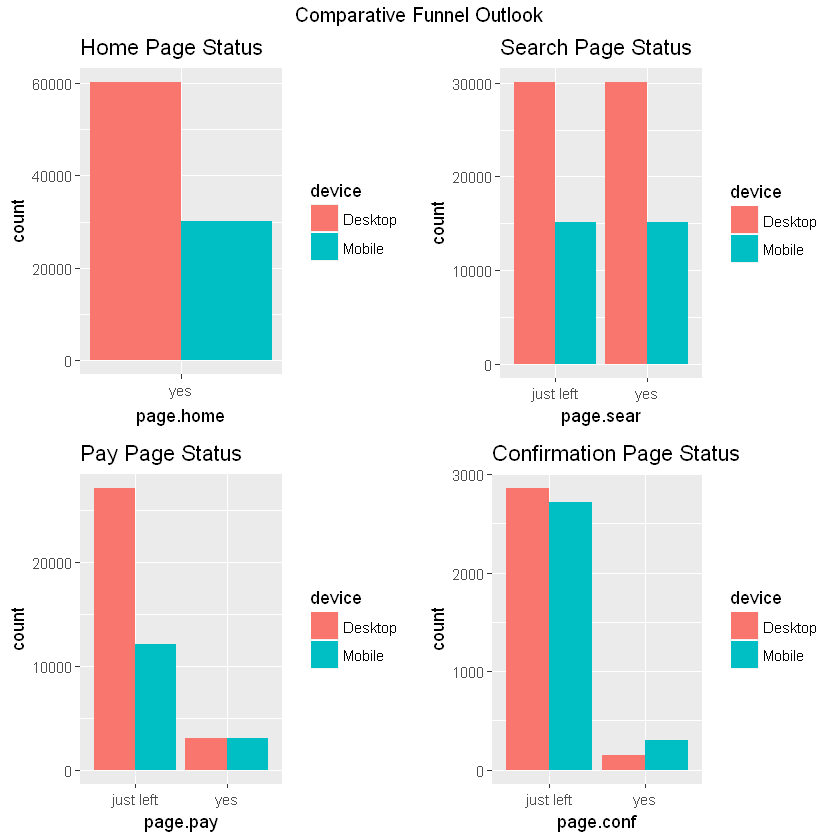

In [9]:
g1 <- ggplot(data = comp, aes(x = page.home)) + geom_bar(aes(fill = device),  position = "dodge") +
    ggtitle("Home Page Status")
g2 <- ggplot(data = comp, aes(x = page.sear)) + geom_bar(aes(fill = device),  position = "dodge") +
    ggtitle("Search Page Status")
g3 <- ggplot(data = comp %>% filter(page.pay != "no"), aes(x = page.pay)) + geom_bar(aes(fill = device),  position = "dodge") +
    ggtitle("Pay Page Status")
g4 <- ggplot(data = comp %>% filter(page.conf != "no"), aes(x = page.conf)) + geom_bar(aes(fill = device),  position = "dodge") +
    ggtitle("Confirmation Page Status")
grid.arrange(g1,g2,g3,g4, nrow = 2, top = "Comparative Funnel Outlook")

As seen from this joined graph, while way less people started off with mobile, more mobile user successfully converted into purchasing the item by the end. There is also an obvious gap in conversion rate particularly in the payment page, which is something that needs to be looked into

### Variable Investigation

After looking into the funnel conversion picture of desktop and mobile user, I will investigate further the impact of the other variables on the conversion rate at each phase. But before that I will first create two new variable from the time variable, one indicating which day of the week did the user accesss the website, while the other indicating which week fo the year.

In [10]:
comp$weekdays <- as.character(weekdays(comp$date))
comp$weekofyear <- format(comp$date, "%V")
comp$weekdays <- factor(comp$weekdays, levels = c("Monday", "Tuesday", "Wednesday",
                                                    "Thursday", "Friday", "Saturday",
                                                    "Sunday"))

Now I shall plot out the graph showing weekly trends

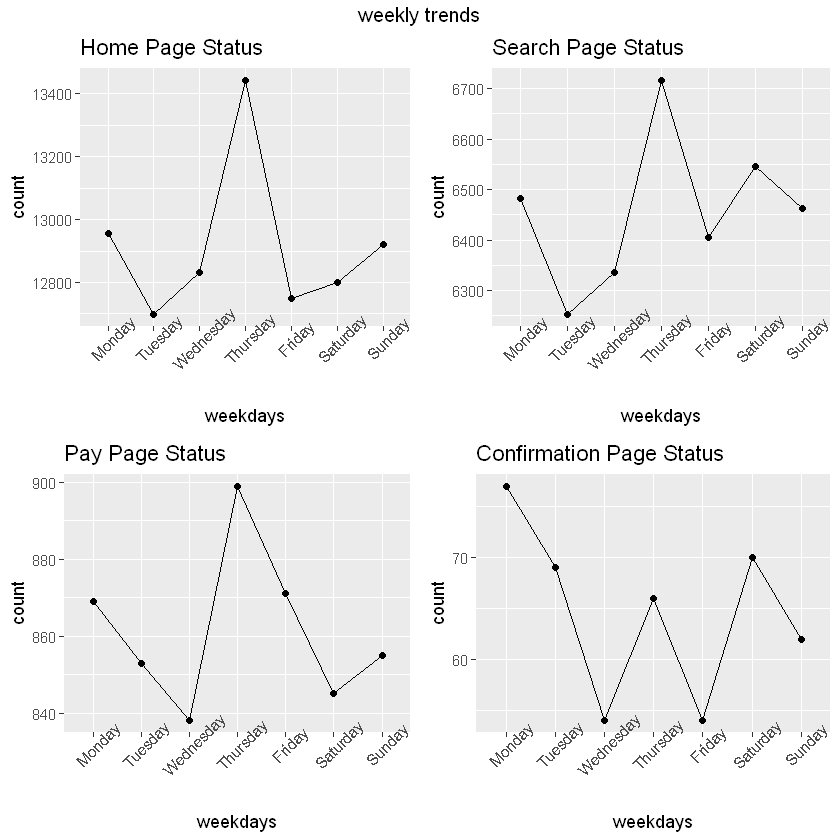

In [11]:
g1 <- ggplot(data = comp %>% filter(page.home == "yes") %>% group_by(weekdays) %>% summarize(count = n()), 
             aes(x = weekdays, y = count, group = 1)) + geom_point() + geom_line() +
    ggtitle("Home Page Status") + theme(axis.text.x = element_text(angle = 45))
g2 <- ggplot(data = comp %>% filter(page.sear == "yes") %>% group_by(weekdays) %>% summarize(count = n()), 
             aes(x = weekdays, y = count, group = 1)) + geom_point() + geom_line() +
    ggtitle("Search Page Status")+ theme(axis.text.x = element_text(angle = 45))
g3 <- ggplot(data = comp %>% filter(page.pay == "yes") %>% group_by(weekdays) %>% summarize(count = n()), 
             aes(x = weekdays, y = count, group = 1)) + geom_point() + geom_line() +
    ggtitle("Pay Page Status")+ theme(axis.text.x = element_text(angle = 45))
g4 <- ggplot(data = comp %>% filter(page.conf == "yes")%>% group_by(weekdays) %>% summarize(count = n()), 
             aes(x = weekdays, y = count, group = 1)) + geom_point() + geom_line() +
    ggtitle("Confirmation Page Status")+ theme(axis.text.x = element_text(angle = 45))
grid.arrange(g1,g2,g3,g4, nrow = 2, top = "weekly trends")

As seens from the graph, the trend peaks on a thursday, which seems quite strange, so let us investigate whether or not this is because the date just conincidental fall on a thursday beginning and end

In [12]:
head(comp[order(comp$date),])
head(comp[order(comp$date, decreasing = TRUE),])

,user_id,date,device,sex,page.home,page.sear,page.pay,page.conf,weekdays,weekofyear
148,1659,2015-01-01,Mobile,Female,yes,yes,just left,no,Thursday,01
338,3790,2015-01-01,Mobile,Male,yes,yes,yes,just left,Thursday,01
565,6386,2015-01-01,Desktop,Female,yes,just left,no,no,Thursday,01
618,6953,2015-01-01,Mobile,Male,yes,yes,just left,no,Thursday,01
804,8722,2015-01-01,Desktop,Female,yes,just left,no,no,Thursday,01
919,9878,2015-01-01,Desktop,Female,yes,yes,just left,no,Thursday,01


,user_id,date,device,sex,page.home,page.sear,page.pay,page.conf,weekdays,weekofyear
27,317,2015-04-30,Desktop,Male,yes,yes,just left,no,Thursday,18
109,1266,2015-04-30,Desktop,Female,yes,just left,no,no,Thursday,18
203,2284,2015-04-30,Desktop,Female,yes,yes,yes,just left,Thursday,18
211,2394,2015-04-30,Desktop,Female,yes,yes,just left,no,Thursday,18
536,6027,2015-04-30,Desktop,Female,yes,just left,no,no,Thursday,18
564,6382,2015-04-30,Desktop,Male,yes,just left,no,no,Thursday,18


Our suspicion checks out, this also help explain why the conversion rate of the users who visted the site on a thursday by the end is still quite low. It seems to follow the pattern of its neighbor's conversion rate. Another surprising find is that despite having a low amount of user in the beginning, Saturday and Tuesday seems to have quite a high final conversion rate, while Sunday having a low one.

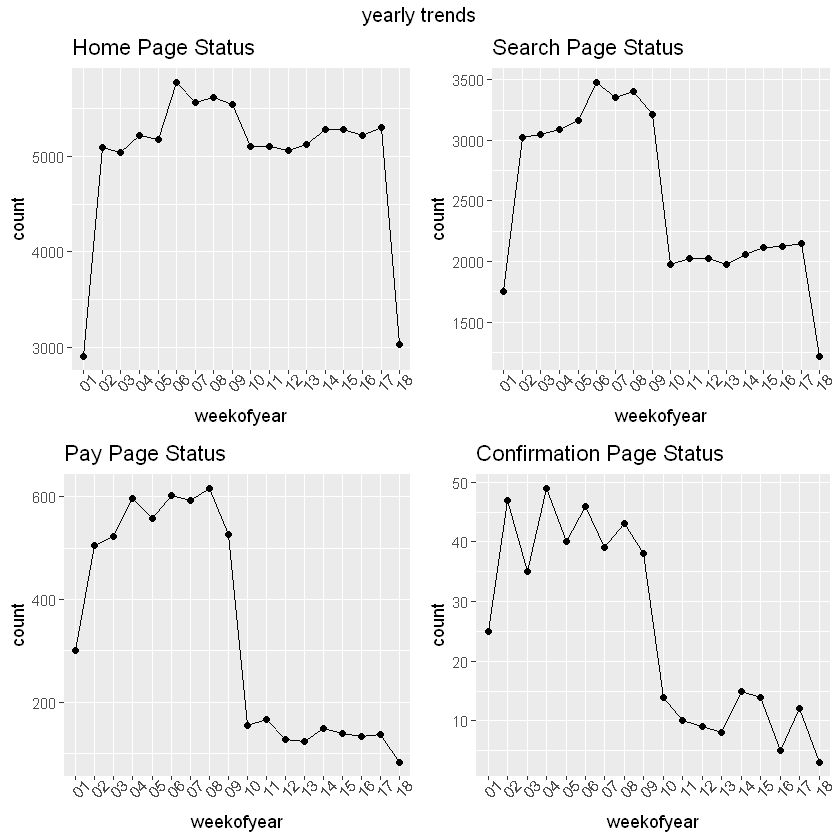

In [13]:
g1 <- ggplot(data = comp %>% filter(page.home == "yes") %>% group_by(weekofyear) %>% summarize(count = n()), 
             aes(x = weekofyear, y = count, group = 1)) + geom_point() + geom_line() +
    ggtitle("Home Page Status") + theme(axis.text.x = element_text(angle = 45))
g2 <- ggplot(data = comp %>% filter(page.sear == "yes") %>% group_by(weekofyear) %>% summarize(count = n()), 
             aes(x = weekofyear, y = count, group = 1)) + geom_point() + geom_line() +
    ggtitle("Search Page Status")+ theme(axis.text.x = element_text(angle = 45))
g3 <- ggplot(data = comp %>% filter(page.pay == "yes") %>% group_by(weekofyear) %>% summarize(count = n()), 
             aes(x = weekofyear, y = count, group = 1)) + geom_point() + geom_line() +
    ggtitle("Pay Page Status")+ theme(axis.text.x = element_text(angle = 45))
g4 <- ggplot(data = comp %>% filter(page.conf == "yes")%>% group_by(weekofyear) %>% summarize(count = n()), 
             aes(x = weekofyear, y = count, group = 1)) + geom_point() + geom_line() +
    ggtitle("Confirmation Page Status")+ theme(axis.text.x = element_text(angle = 45))
grid.arrange(g1,g2,g3,g4, nrow = 2, top = "yearly trends")

These graphs showing the impact of the week of the year offers quite an interesting insight. While the user who visited the home page remain stable through out the year, there was a drastic drop of conversion rate from the home page to the search page on the 10th week. Such trend also persisted since then. This is really a strange phenomena and one we should look further into.

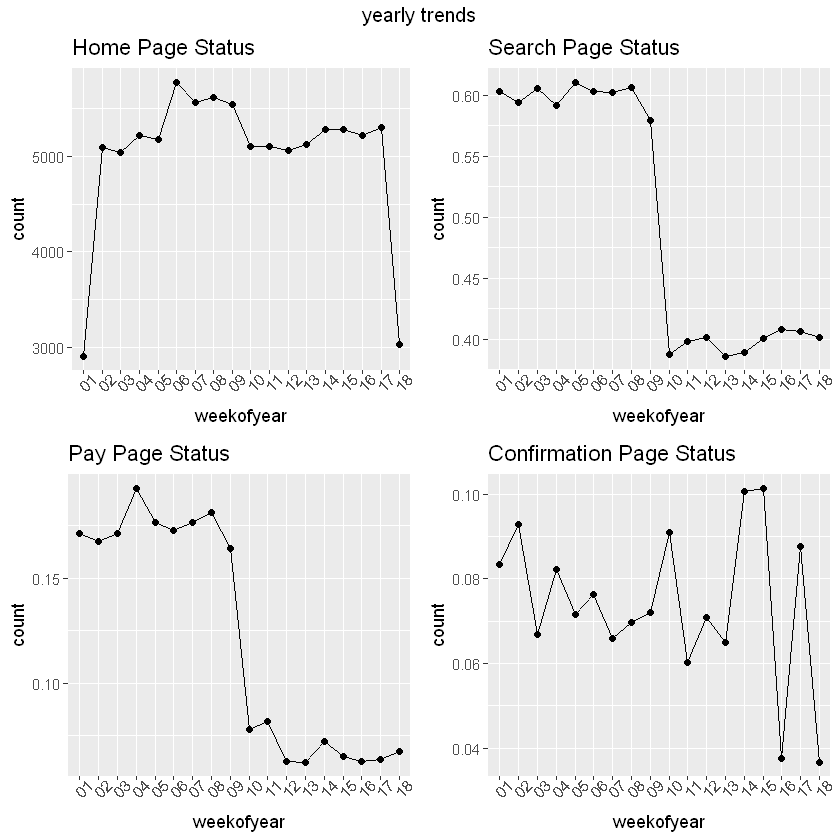

In [14]:
g1 <- ggplot(data = comp %>% filter(page.home == "yes") %>% group_by(weekofyear) %>% summarize(count = n()), 
             aes(x = weekofyear, y = count, group = 1)) + geom_point() + geom_line() +
    ggtitle("Home Page Status") + theme(axis.text.x = element_text(angle = 45))
g2 <- ggplot(data = comp %>% group_by(weekofyear) %>% 
             summarize(count = sum(page.sear == "yes")/(sum(page.sear == "yes") + sum(page.sear == "just left"))), 
             aes(x = weekofyear, y = count, group = 1)) + geom_point() + geom_line() +
    ggtitle("Search Page Status")+ theme(axis.text.x = element_text(angle = 45))
g3 <- ggplot(data = comp %>% group_by(weekofyear) %>% 
             summarize(count = sum(page.pay == "yes")/(sum(page.pay == "yes") + sum(page.pay == "just left"))), 
             aes(x = weekofyear, y = count, group = 1)) + geom_point() + geom_line() +
    ggtitle("Pay Page Status")+ theme(axis.text.x = element_text(angle = 45))
g4 <- ggplot(data = comp %>% group_by(weekofyear) %>% 
             summarize(count = sum(page.conf == "yes")/(sum(page.conf == "yes") + sum(page.conf == "just left"))), 
             aes(x = weekofyear, y = count, group = 1)) + geom_point() + geom_line() +
    ggtitle("Confirmation Page Status")+ theme(axis.text.x = element_text(angle = 45))
grid.arrange(g1,g2,g3,g4, nrow = 2, top = "yearly trends")

Breaking the graph down into conversion percentages made it even clearer that there was a drop in conversion rate, however the drop seems also quite apparent in the payment page, and just very eratic in the payment confirmation page. We will put a hold on this first and identify possible causes later on. But before that let us look into the gender variable.

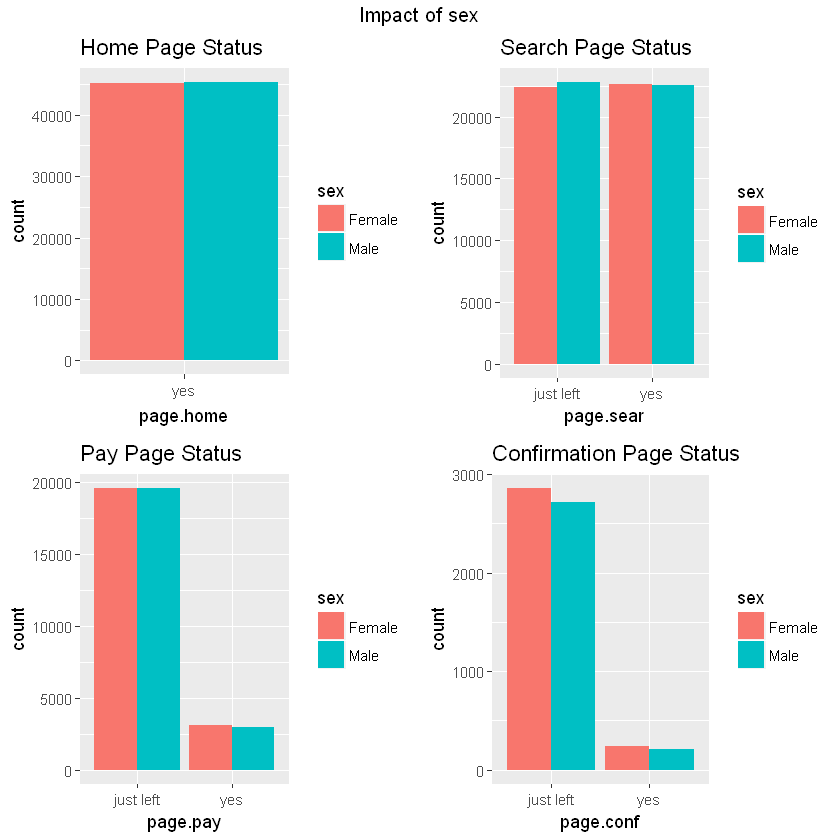

In [15]:
g1 <- ggplot(data = comp, aes(x = page.home)) + geom_bar(aes(fill = sex),  position = "dodge") +
    ggtitle("Home Page Status")
g2 <- ggplot(data = comp, aes(x = page.sear)) + geom_bar(aes(fill = sex),  position = "dodge") +
    ggtitle("Search Page Status")
g3 <- ggplot(data = comp %>% filter(page.pay != "no"), aes(x = page.pay)) + geom_bar(aes(fill = sex),  position = "dodge")+
    ggtitle("Pay Page Status")
g4 <- ggplot(data = comp %>% filter(page.conf != "no"), aes(x = page.conf)) + geom_bar(aes(fill = sex),  position = "dodge") +
    ggtitle("Confirmation Page Status")
grid.arrange(g1,g2,g3,g4, nrow = 2, top = "Impact of sex")

Just simply looking at the aggregate doesn't seem quite clear although it does come to show how it started with less female but ended with more making final convert, but let us dig deeper and look at the conversion rate.

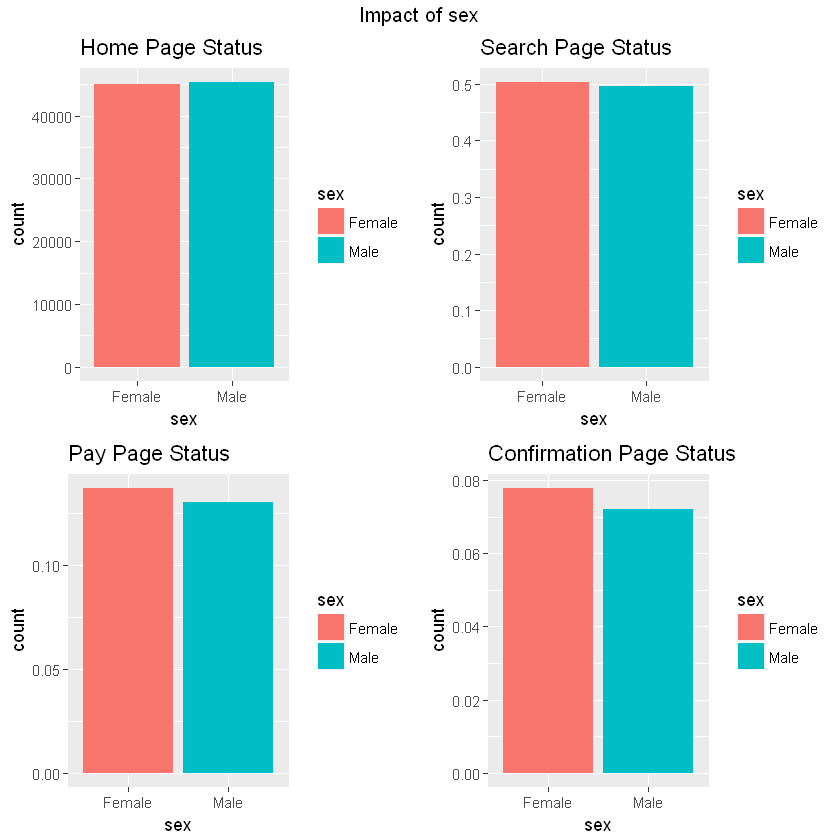

In [16]:
g1 <- ggplot(data = comp %>% filter(page.home == "yes") %>% group_by(sex) %>% summarize(count = n()), 
             aes(x = sex, y = count, group = 1)) + geom_bar(stat = "identity", aes(fill = sex)) +
    ggtitle("Home Page Status")
g2 <- ggplot(data = comp %>% group_by(sex) %>% 
             summarize(count = sum(page.sear == "yes")/(sum(page.sear == "yes") + sum(page.sear == "just left"))), 
             aes(x = sex, y = count, group = 1)) + geom_bar(stat = "identity", aes(fill = sex)) +
    ggtitle("Search Page Status")
g3 <- ggplot(data = comp %>% group_by(sex) %>% 
             summarize(count = sum(page.pay == "yes")/(sum(page.pay == "yes") + sum(page.pay == "just left"))), 
             aes(x = sex, y = count, group = 1)) + geom_bar(stat = "identity", aes(fill = sex)) +
    ggtitle("Pay Page Status")
g4 <- ggplot(data = comp %>% group_by(sex) %>% 
             summarize(count = sum(page.conf == "yes")/(sum(page.conf == "yes") + sum(page.conf == "just left"))), 
             aes(x = sex, y = count, group = 1)) + geom_bar(stat = "identity", aes(fill = sex)) +
    ggtitle("Confirmation Page Status")
grid.arrange(g1,g2,g3,g4, nrow = 2, top = "Impact of sex")

now this seems slightly clearer, and in fact male user do have a higher propensity to leave the page at all funnels

now let us look into the weird yearly trend again

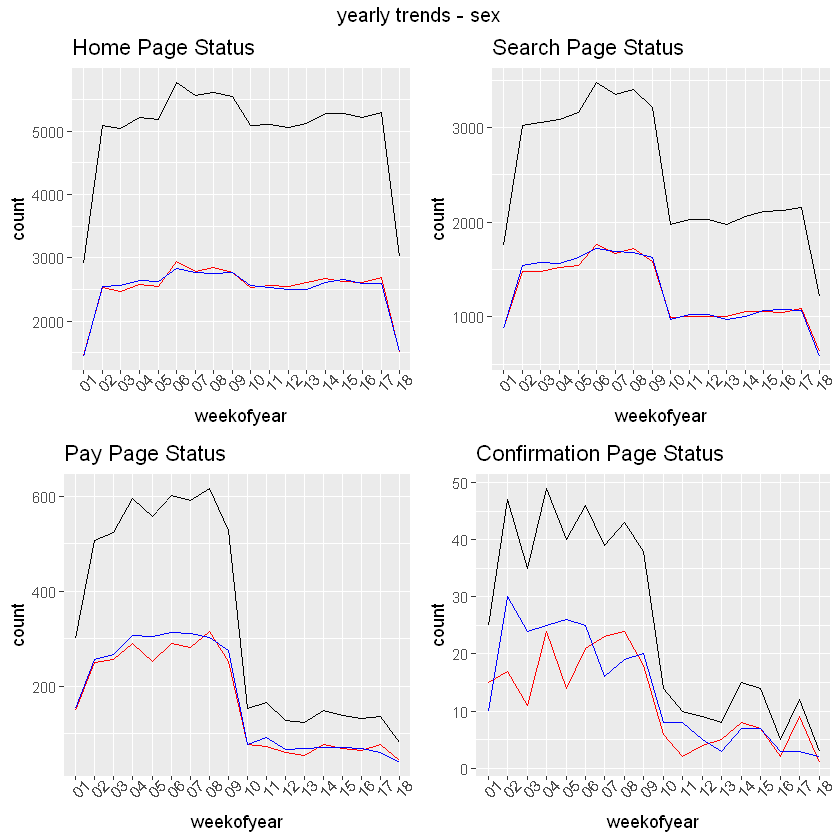

In [22]:
g1 <- ggplot(data = comp %>% filter(page.home == "yes") %>% group_by(weekofyear) %>% 
             summarize(male = sum(sex == "Male"), female = sum(sex == "Female"), count = n()), 
             aes(x = weekofyear, group = 1)) + geom_line(aes(y = count)) + 
                geom_line(aes(y = male), col = "red") + geom_line(aes(y = female), col = "blue") +
    ggtitle("Home Page Status") + theme(axis.text.x = element_text(angle = 45))
g2 <- ggplot(data = comp %>% filter(page.sear == "yes") %>% group_by(weekofyear) %>% summarize(male = sum(sex == "Male"), female = sum(sex == "Female"), count = n()), 
             aes(x = weekofyear, group = 1)) + geom_line(aes(y = count)) + 
                geom_line(aes(y = male), col = "red") + geom_line(aes(y = female), col = "blue") +
    ggtitle("Search Page Status")+ theme(axis.text.x = element_text(angle = 45))
g3 <- ggplot(data = comp %>% filter(page.pay == "yes") %>% group_by(weekofyear) %>% summarize(male = sum(sex == "Male"), female = sum(sex == "Female"), count = n()), 
             aes(x = weekofyear, group = 1)) + geom_line(aes(y = count)) + 
                geom_line(aes(y = male), col = "red") + geom_line(aes(y = female), col = "blue") +
    ggtitle("Pay Page Status")+ theme(axis.text.x = element_text(angle = 45))
g4 <- ggplot(data = comp %>% filter(page.conf == "yes")%>% group_by(weekofyear) %>% summarize(male = sum(sex == "Male"), female = sum(sex == "Female"), count = n()), 
             aes(x = weekofyear, group = 1)) + geom_line(aes(y = count)) + 
                geom_line(aes(y = male), col = "red") + geom_line(aes(y = female), col = "blue") +
    ggtitle("Confirmation Page Status")+ theme(axis.text.x = element_text(angle = 45))
grid.arrange(g1,g2,g3,g4, nrow = 2, top = "yearly trends - sex")

these graphs aim to see whether or not the sex of the user may have contributed to the drastic drop, but according to the trend, it doesn't seem quite likely

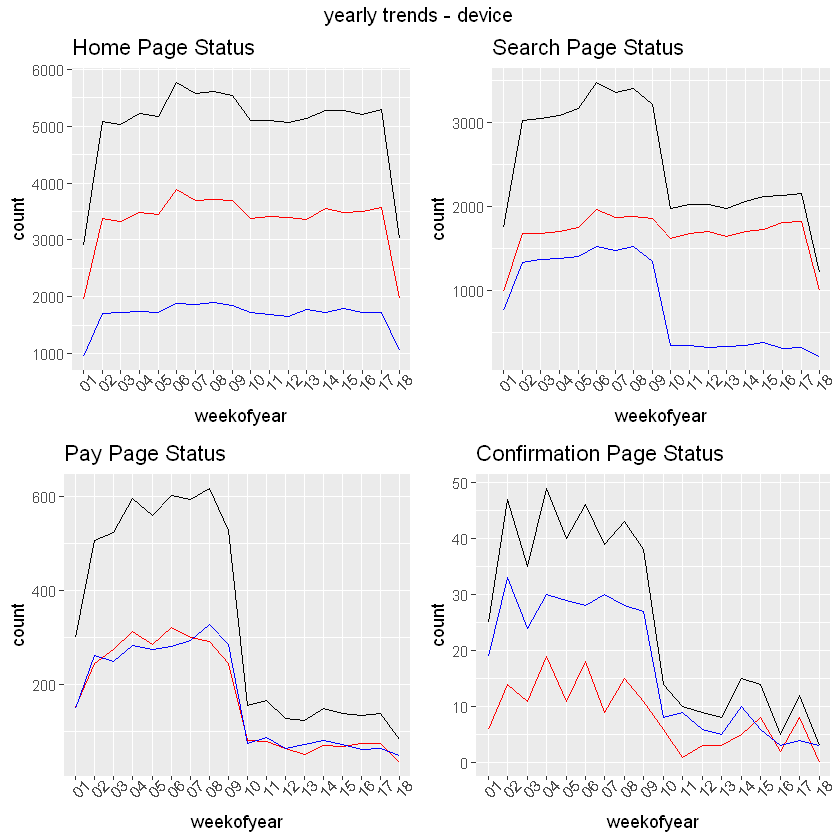

In [23]:
g1 <- ggplot(data = comp %>% filter(page.home == "yes") %>% group_by(weekofyear) %>% 
             summarize(desktop = sum(device == "Desktop"), mobile = sum(device == "Mobile"), count = n()), 
             aes(x = weekofyear, group = 1)) + geom_line(aes(y = count)) + 
                geom_line(aes(y = desktop), col = "red") + geom_line(aes(y = mobile), col = "blue") +
    ggtitle("Home Page Status") + theme(axis.text.x = element_text(angle = 45))
g2 <- ggplot(data = comp %>% filter(page.sear == "yes") %>% group_by(weekofyear) %>% summarize(desktop = sum(device == "Desktop"), mobile = sum(device == "Mobile"), count = n()), 
             aes(x = weekofyear, group = 1)) + geom_line(aes(y = count)) + 
                geom_line(aes(y = desktop), col = "red") + geom_line(aes(y = mobile), col = "blue") +
    ggtitle("Search Page Status")+ theme(axis.text.x = element_text(angle = 45))
g3 <- ggplot(data = comp %>% filter(page.pay == "yes") %>% group_by(weekofyear) %>% summarize(desktop = sum(device == "Desktop"), mobile = sum(device == "Mobile"), count = n()), 
             aes(x = weekofyear, group = 1)) + geom_line(aes(y = count)) + 
                geom_line(aes(y = desktop), col = "red") + geom_line(aes(y = mobile), col = "blue") +
    ggtitle("Pay Page Status")+ theme(axis.text.x = element_text(angle = 45))
g4 <- ggplot(data = comp %>% filter(page.conf == "yes")%>% group_by(weekofyear) %>% summarize(desktop = sum(device == "Desktop"), mobile = sum(device == "Mobile"), count = n()), 
             aes(x = weekofyear, group = 1)) + geom_line(aes(y = count)) + 
                geom_line(aes(y = desktop), col = "red") + geom_line(aes(y = mobile), col = "blue") +
    ggtitle("Confirmation Page Status")+ theme(axis.text.x = element_text(angle = 45))
grid.arrange(g1,g2,g3,g4, nrow = 2, top = "yearly trends - device")

Here is something more interesting, these graphs whihc shows the relationship of devices to the yearly conversion rate, comes to show that the drop on the home page to search page is mainly due to the drop in the mobile section, while for the search page to pay page it is a drop across the board. this is something that the firm should look into into and try to fix.

The last thing we could look at is the intersection of device and sex

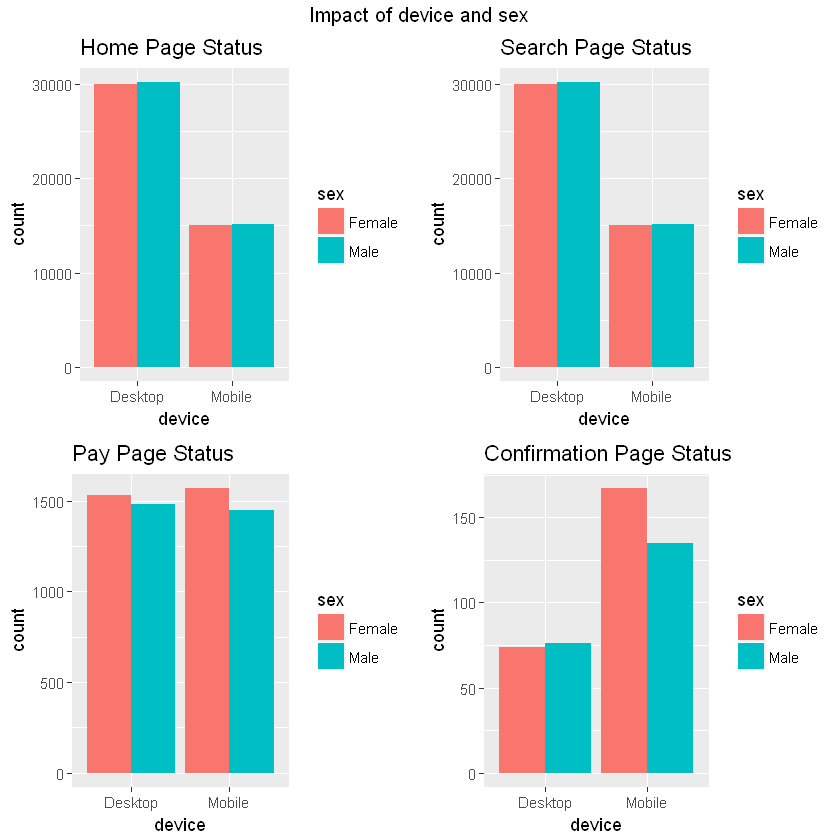

In [24]:
g1 <- ggplot(data = comp %>% filter(page.home == "yes"), aes(x = device)) + geom_bar(aes(fill = sex),  position = "dodge") +
    ggtitle("Home Page Status")
g2 <- ggplot(data = comp%>% filter(page.home == "yes"), aes(x = device)) + geom_bar(aes(fill = sex),  position = "dodge") +
    ggtitle("Search Page Status")
g3 <- ggplot(data = comp %>% filter(page.pay == "yes"), aes(x = device)) + geom_bar(aes(fill = sex),  position = "dodge")+
    ggtitle("Pay Page Status")
g4 <- ggplot(data = comp %>% filter(page.conf == "yes"), aes(x = device)) + geom_bar(aes(fill = sex),  position = "dodge") +
    ggtitle("Confirmation Page Status")
grid.arrange(g1,g2,g3,g4, nrow = 2, top = "Impact of device and sex")

Not much to our surprise, female using the mobile platform has has the highest final conversion number. Another string indication for the further expansion of the firm.

## Business Recommendation

So to summarize and translate our findings into some business recommendations.

1. The business should put a greater premium on the mobile platform. It only contains about a third of its total user, but generate more converted users compared to that of the desktop.
2. The conversion rate from the home page to search page can be greatly improved. Marketing should look into how to make the home page more appealing.
3. the big drop in payment confirmation page also needs to be taken seriously. There might be a huge tax that wasn't mentioned in the prior, thus triggering the drop.
4. The firm should capitalize the weekly trends on saturday and tuesday, and possible put out more ads and promos on those days since it has a high conversion rate.
5. the firm needs to investigate further as to why there was a drastic drop in the 10th week. There might have been new comptetitors that have a better feature in the home page and search page. It is also possible that the drop may have originated because or some website/operation bug. Specifically there might have been something wrong with the home page of the mobile user inhibiting them from moving on to the search page, however there might have been a problem across the board on the search page causing a hollistic drop.
6. While the sex of the user is not as important, the firm should in fact look into expanding the female market, especially those that are using mobile, further since they have the higher conversion rate. 
7. The firm should also investigate why the desktop users particularly like to drop out in the payment and confirmation page, there might be a lack of payment method that could be improved.